# K - MEANS Clustering
show the progress of coding step by step

- K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.
- Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes.
- In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.
- The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.


In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np

### Preparation

In [2]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data
X.shape

(150, 4)

In [3]:
# we only need the first 2 columns
X= X[:,:2]
X.shape

(150, 2)

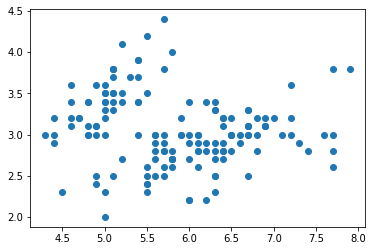

In [4]:
# plot the data
plt.scatter(X[:,0],X[:,1])

### Step 1. Start from k=2 for the K-Mean cluster, code step by step
- k = 2, and generate the centroids randomly
- create function of distance
- create function of assignment to find the closest centroid for x point
    - definition of the assignment function to find the closest/min of the distance between x(one point) and centroid(one of the Centroids) 
    - return the index of the centroid by argmin()
    - Then we can find which centroid is most closest/min distance to x, that means x blong to that centroid cluster.
- plot the data in 2 groups
- create function of make-class 
- divide the data in to 2 groups to A
- create function of new_centroids to generate the mean center for each cluster as the new_centroids

In [5]:
# generate centroids randomly
k=2
C=[]
for _ in range(k):
    i = np.random.randint(len(X))
    C.append(X[i,:])
C

[array([6.2, 2.8]), array([5.8, 4. ])]

In [6]:
# function of distance between 2 points
def distance(v,w):
    return np.sqrt((v-w)@(v-w))
distance(C[0],X[0])

1.3038404810405302

In [7]:
# definition of the function to find the closest/min of the distance between x(one point) and centroid(one of the Centroids) 
# and return the index of the centroid by argmin()
# Then we can find which centroid is most closest/min distance to x, that means x blong to that centroid cluster.
def assignment(x,Centroids):
    distances = np.array([distance(x,centroid) for centroid in Centroids])
    return np.argmin(distances)
# get the result 
assignment(X[1],C)

0

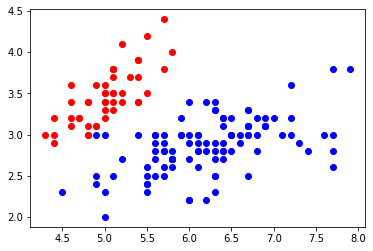

In [8]:
# plot data in 2 groups
for x in X:
    if assignment(x,C)==0:
        plt.scatter(x[0],x[1],color = "blue")
    else:
        plt.scatter(x[0],x[1],color = "red")
plt.show()

In [9]:
# divide the data in to 2 groups to A
def make_classes(data, Centroids):
    A = dict()
    for i in range(len(Centroids)):
        A[i]=[]
    for x in data:
        A[assignment(x,Centroids)].append(x)
    return A
# get the result of A
A = make_classes(X,C)


In [10]:
A[0][:5]

[array([4.9, 3. ]),
 array([5., 3.]),
 array([4.5, 2.3]),
 array([7. , 3.2]),
 array([6.4, 3.2])]

In [11]:
A[1][:5]

[array([5.1, 3.5]),
 array([4.7, 3.2]),
 array([4.6, 3.1]),
 array([5. , 3.6]),
 array([5.4, 3.9])]

In [12]:
# definition function of new_centroids
# Generate the mean center for each cluster as the new_centroids
def new_centroids(data, Centroids):
    new_centroids = []
    A = make_classes(data, Centroids)
    for i in range(len(Centroids)):
        a=(1/len(A[i]))*sum(A[i])
        new_centroids.append(a)
    return new_centroids
new_C = new_centroids(X,C)
new_C

[array([6.21941748, 2.86893204]), array([5.01914894, 3.47021277])]

### Step 2. put code together, try k=3 
- then we can draw the points in different color ,and see the progress from C0 to C1,to C2, to C3.

In [13]:
# 2. put the funtions together 

def initialize_centroids(data, k =2):
    Centroids =[]
    for _ in range(k):
        i = np.random.randint(len(data))
        Centroids.append(X[i,:])
    return Centroids
    
def assignment(x,Centroids):
    distances = np.array([distance(x,centroid) for centroid in Centroids])
    return np.argmin(distances)

def make_classes(data, Centroids):
    A = dict()
    for i in range(len(Centroids)):
        A[i]=[]
    for x in data:
        A[assignment(x,Centroids)].append(x)
    return A

def new_centroids(data, Centroids):
    new_centroids = []
    A = make_classes(data, Centroids)
    for i in range(len(Centroids)):
        a=(1/len(A[i]))*sum(A[i])
        new_centroids.append(a)
    return new_centroids

In [14]:
# try with k=3 and data=iris.data
k = 3
C0=initialize_centroids(X,k=k)
C1=new_centroids(X,C0)
C2=new_centroids(X,C1)
C3=new_centroids(X,C2)

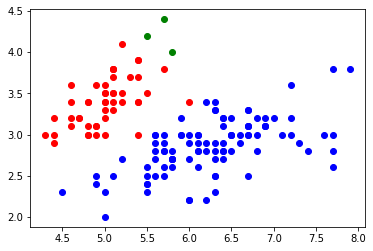

In [15]:
## then we can draw the points in different color ,and see the progress from C0 to C1,to C2, to C3.
for x in X:
    if assignment(x,C0) == 0:
        plt.scatter(x[0],x[1],color ="blue")
    elif assignment(x,C0) == 1:
        plt.scatter(x[0],x[1],color ="green")
    else:
        plt.scatter(x[0],x[1],color ="red")
        

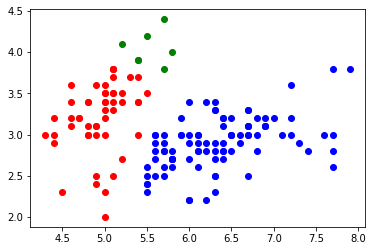

In [16]:
for x in X:
    if assignment(x,C1) == 0:
        plt.scatter(x[0],x[1],color ="blue")
    elif assignment(x,C1) == 1:
        plt.scatter(x[0],x[1],color ="green")
    else:
        plt.scatter(x[0],x[1],color ="red")

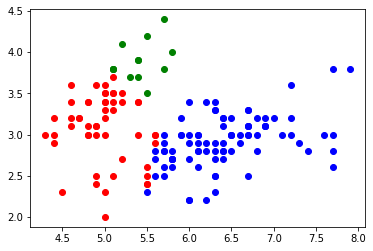

In [17]:
for x in X:
    if assignment(x,C2) == 0:
        plt.scatter(x[0],x[1],color ="blue")
    elif assignment(x,C2) == 1:
        plt.scatter(x[0],x[1],color ="green")
    else:
        plt.scatter(x[0],x[1],color ="red")

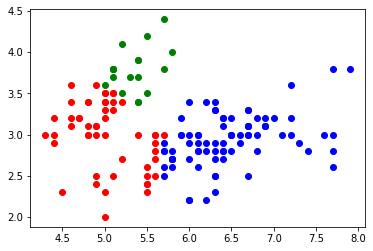

In [18]:
for x in X:
    if assignment(x,C3) == 0:
        plt.scatter(x[0],x[1],color ="blue")
    elif assignment(x,C3) == 1:
        plt.scatter(x[0],x[1],color ="green")
    else:
        plt.scatter(x[0],x[1],color ="red")

In [19]:
k=3
C=[]
C_old = initialize_centroids(X,k=k)
C_new = new_centroids(X,C0)
centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
iterations = 0
max_iterations = 100
epsilon = 0.1
while max(centroid_distances)> epsilon and iterations< max_iterations:
    C_old, C_new = C_new, new_centroids(X,C_old)
    centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
    iterations +=1
print(centroid_distances)
    



[0.0, 1.0631162807591166, 1.0631162807591166]


In [20]:
C_old = initialize_centroids(X, k=k)
C_new = new_centroids(X, C_old)
[distance(p[0], p[1]) for p in zip(C_old, C_new)]

[0.48407154379861245, 0.21552622939112426, 0.17921084772670692]

In [21]:
# check what is the p
[p for p in zip(C_old, C_new)]

[(array([6.2, 2.2]), array([5.76470588, 2.41176471])),
 (array([6.4, 2.8]), array([6.48666667, 2.99733333])),
 (array([5. , 3.5]), array([5.03448276, 3.32413793]))]

### step3 to measure the errors
- define the fit to find the best centroids
- define the MSE of class to measure the errors

In [22]:
def fit(data, k =3 , max_iterations=100, epsilon = 0.01):
    C_old = initialize_centroids(data,k=k)
    C_new = new_centroids(data,C0)
    centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
    iterations = 0

    while max(centroid_distances)> epsilon and iterations< max_iterations:
        C_old, C_new = C_new, new_centroids(data,C_new)
        centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
        iterations +=1
    return C_new


In [23]:
fit(X)

[array([6.81276596, 3.07446809]),
 array([5.006, 3.428]),
 array([5.77358491, 2.69245283])]

In [24]:
def mse_classes(data, Centroids):
    errors = []
    A_classes =  make_classes(data, Centroids)
    for i, centroid in enumerate(Centroids):
        error = sum(0.5*(centroid-a)**2 for a in A_classes[i])
        errors.append(error)
    return sum(errors)

In [25]:
C = fit(X)
mse_classes(X,C)

array([11.34177965,  7.18357142])

### Step 4: get the final gathered code 
- have a look at the improvement of the progress with k-mean 

In [26]:
# put the funtions together again with  fit and mse_classes

def initialize_centroids(data, k =2):
    Centroids =[]
    for _ in range(k):
        i = np.random.randint(len(X))
        Centroids.append(X[i,:])
    return Centroids

    
def assignment(x,Centroids):
    distances = np.array([distance(x,centroid) for centroid in Centroids])
    return np.argmin(distances)

def make_classes(data, Centroids):
    A = dict()
    for i in range(len(Centroids)):
        A[i]=[]
    for x in data:
        A[assignment(x,Centroids)].append(x)
    return A

def new_centroids(data, Centroids):
    new_centroids = []
    A = make_classes(data, Centroids)
    for i in range(len(Centroids)):
        new_centroids.append((1/len(A[i]))*sum(A[i]))
    return new_centroids

def fit(data, k =3 , max_iterations=100, epsilon = 0.01):
    C_old = initialize_centroids(data,k=k)
    C_new = new_centroids(data,C_old)
    centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
    iterations = 0

    while max(centroid_distances)> epsilon and iterations< max_iterations:
        C_old, C_new = C_new, new_centroids(data,C_new)
        centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
        iterations +=1
    return C_new

def mse_classes(data, Centroids):
    errors = []
    A_classes = make_classes(data, Centroids)
    for i, centroid in enumerate(Centroids):
        error = sum(0.5*(centroid - a) @ (centroid - a) for a in A_classes[i])
        errors.append(error)    
    return sum(x for x in errors)


In [27]:
C1 = fit(X,k=1)
C2 = fit(X,k=2)
C3 = fit(X,k=3)
C4 = fit(X,k=4)
C5 = fit(X,k=5)
C6 = fit(X,k=6)
C=[C1, C2,C3,C4,C5,C6]

In [28]:
C1 = fit(X,k=1)
C1

[array([5.84333333, 3.05733333])]

In [29]:
C2 = fit(X,k=2)
C2

[array([6.61044776, 2.96567164]), array([5.22409639, 3.1313253 ])]

In [30]:
C3 = fit(X,k=3)
C3

[array([6.81276596, 3.07446809]),
 array([5.006, 3.428]),
 array([5.77358491, 2.69245283])]

In [31]:
C4 = fit(X,k=4)
C4

[array([5.22068966, 3.66551724]),
 array([4.77777778, 2.94444444]),
 array([6.85348837, 3.1       ]),
 array([5.90980392, 2.73529412])]

In [32]:
errors = [mse_classes(X,centroids) for centroids in C]
errors


[65.23763333333338,
 29.22379623044097,
 18.52535106382979,
 14.017491076623111,
 12.115914911419113,
 8.876915643919318]

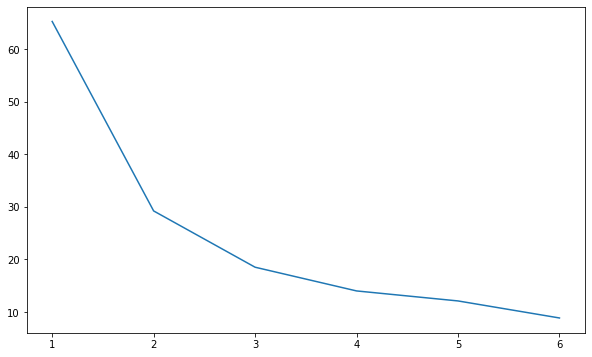

In [33]:
# plot the progress of the improvement in errors 
errors = [mse_classes(X,centroids) for centroids in C]
plt.figure(figsize=(10,6))
plt.plot([i for i in range(1,7)],errors)

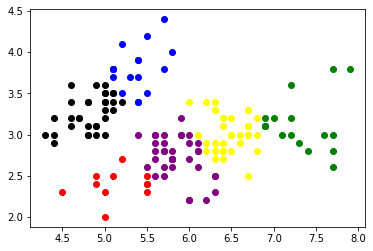

In [34]:
for x in X:
    if assignment(x,C6) == 0:
        plt.scatter(x[0],x[1],color ="blue")
    elif assignment(x,C6) == 1:
        plt.scatter(x[0],x[1],color ="green")
    elif assignment(x,C6) == 2:
        plt.scatter(x[0],x[1],color ="yellow")
    elif assignment(x,C6) == 3:
        plt.scatter(x[0],x[1],color ="purple")
    elif assignment(x,C6) == 4:
        plt.scatter(x[0],x[1],color ="black")
    else:
        plt.scatter(x[0],x[1],color ="red")